In [8]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [9]:
def read(filename):
    f = open(filename)
    raw = f.readlines()
    f.close()
    errors = set()
    err = 0
    k = ''

    data = {'No loss':[],'ADS-B':[],'Wi-Fi beacons':[]}

    rates = set()

    for line in raw:
        ls = line.split()
        if "Error" in ls[0]:
            err = float(ls[1])
            if err < 0:
                err = 0
            continue
        
        if 'No' in ls[0] or 'ADS-B' in ls[0] or 'Wi-Fi' in ls[0]:
            k = ' '.join(ls)
            continue
        rates.add(float(ls[0]))
        data[k].append(float(ls[1]))
    r = list(rates)
    r.sort()
    return data, r

Errors = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0]


In [10]:
d,r = read('results_sw.txt')

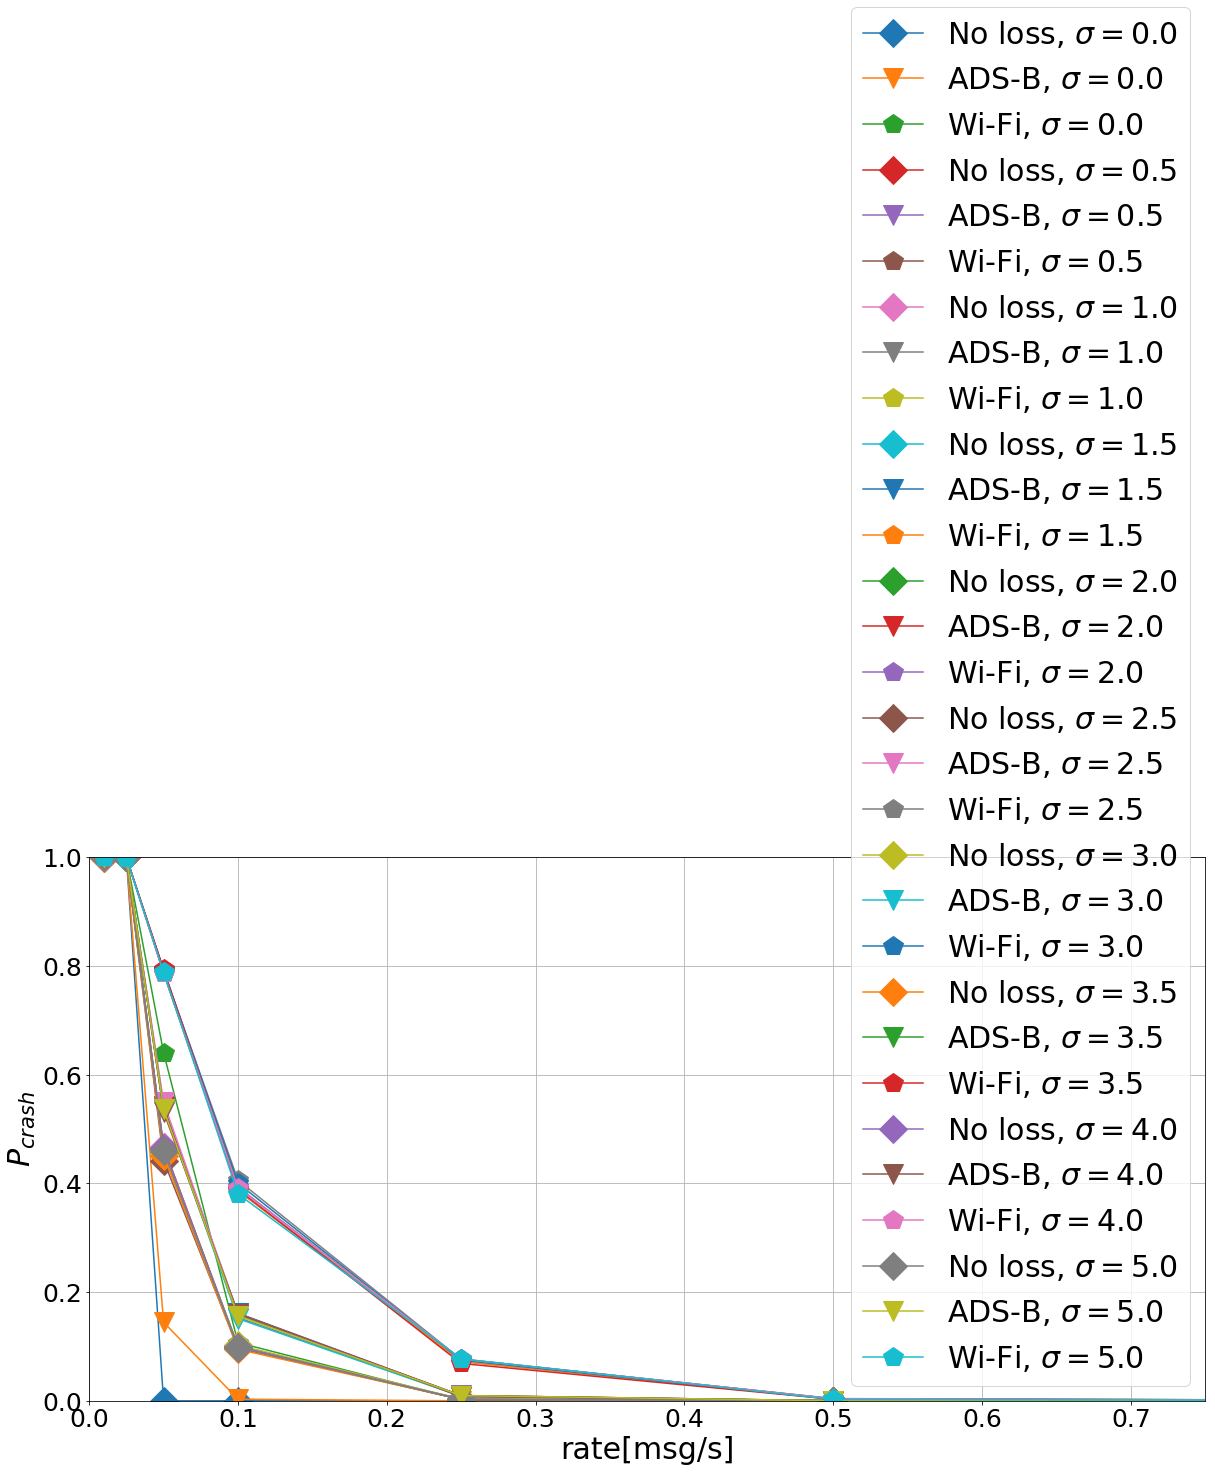

In [11]:
for i in range(len(Errors)):
    nlp0 = d['No loss'][i*len(r):(i+1)*len(r)]
    adp0 = d['ADS-B'][i*len(r):(i+1)*len(r)]
    wip0 = d['Wi-Fi beacons'][i*len(r):(i+1)*len(r)]
    plt.plot(r,nlp0,'D-', label='No loss, $\sigma=%.1f$'%Errors[i], markersize=20)
    plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=%.1f$'%Errors[i], markersize=20)
    plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=%.1f$'%Errors[i], markersize=20)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,0.75,0,1])
#plt.savefig('results.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [12]:
d,r = read('results_avd.txt')

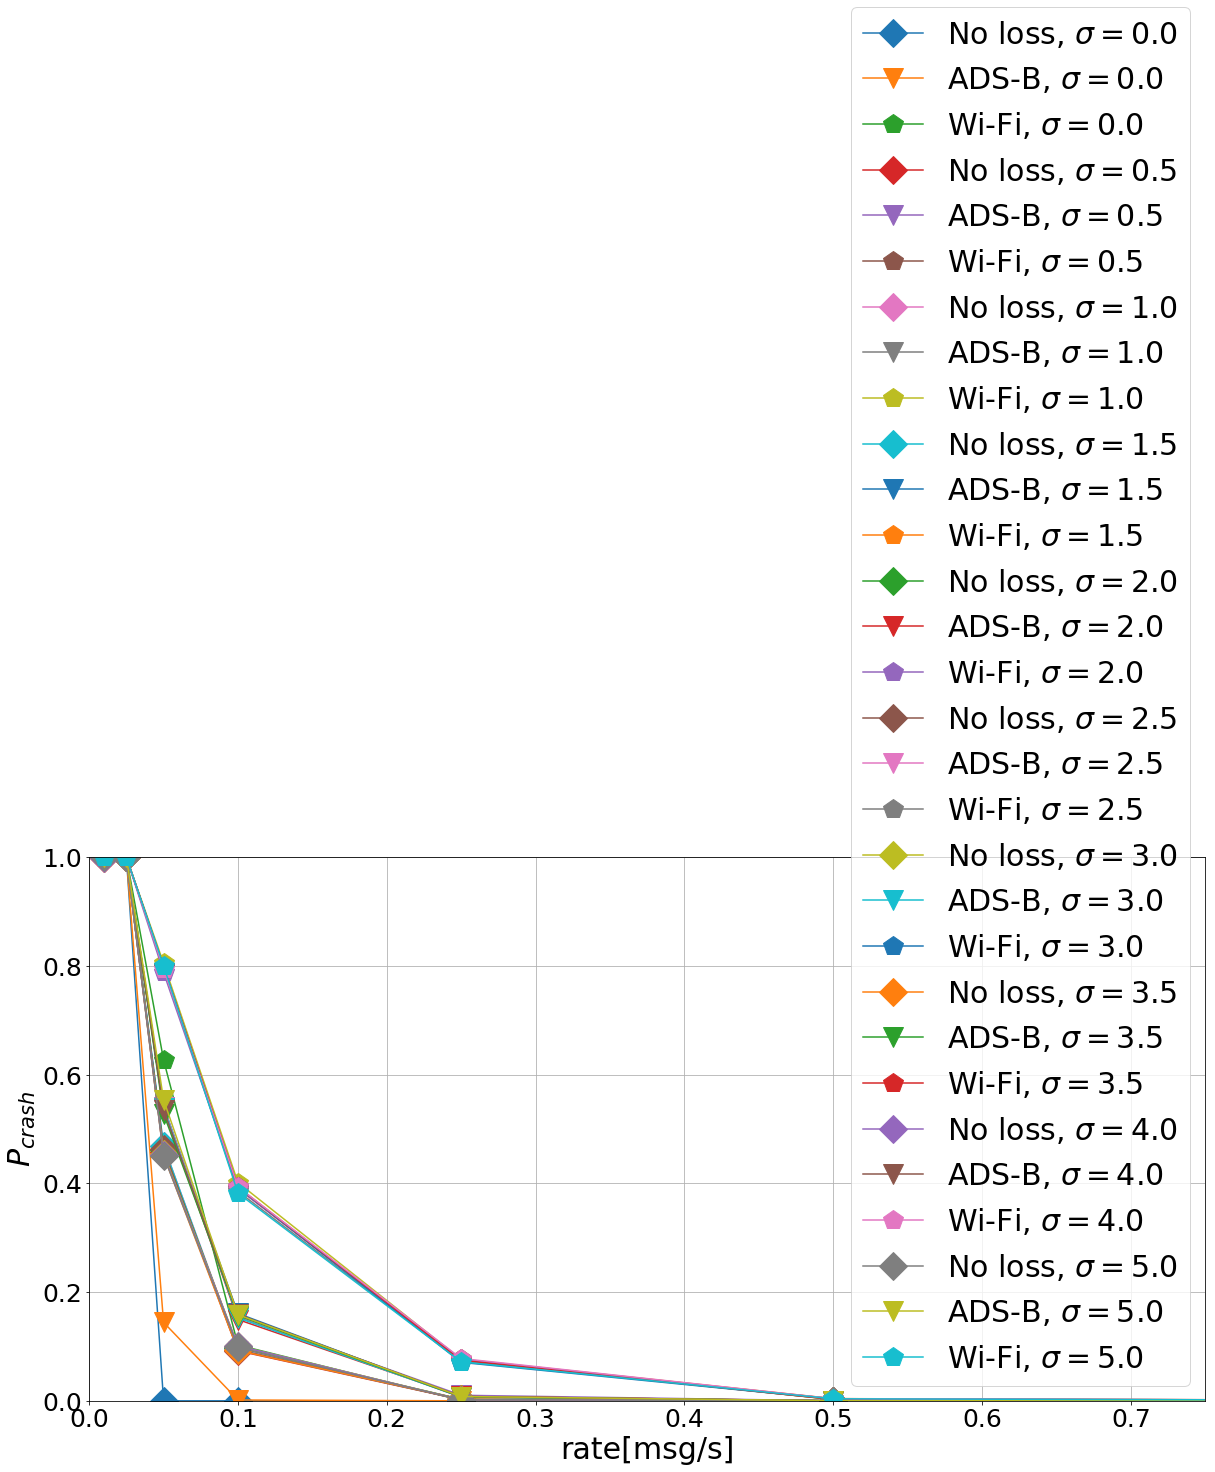

In [13]:
for i in range(len(Errors)):
    nlp0 = d['No loss'][i*len(r):(i+1)*len(r)]
    adp0 = d['ADS-B'][i*len(r):(i+1)*len(r)]
    wip0 = d['Wi-Fi beacons'][i*len(r):(i+1)*len(r)]
    plt.plot(r,nlp0,'D-', label='No loss, $\sigma=%.1f$'%Errors[i], markersize=20)
    plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=%.1f$'%Errors[i], markersize=20)
    plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=%.1f$'%Errors[i], markersize=20)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,0.75,0,1])
#plt.savefig('results.pdf',dpi=300,bbox_inches='tight')
plt.show()